In [1]:
import pandas as pd
import string
import re
import ast
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wordcloud

In [2]:
df1= pd.read_csv("Grab SG Restaurants.csv")

In [3]:
df1.shape

(16136, 19)

In [4]:
df1=df1.loc[df1['loc_type']=='FOOD']


# Preprocessing

In [5]:
df1[['name', 'address']]=df1[['name', 'address']].applymap(lambda x: str(x).strip())

In [6]:
df1['currency']=df1['currency'].fillna('SGD')
df1['delivery_cost']=df1['delivery_cost'].apply(lambda c: c/100)
#count number of cuisine per restaurant
df1['cuisine_count']= df1['cuisine'].apply(lambda x: len(str(x).split(',')))
df1['location']= df1['address'].apply(lambda x: str(x).split(' - ')[-1])
df1= df1.drop(['image_url','id_source'], axis=1)
df1['promo_count'] = df1['promo'].apply(lambda x: 'yes promo'if not pd.isnull(x) else 'no promo')


In [7]:
#breaking down of delivery options
df1['delivery_options']= df1['delivery_options'].apply(lambda x: str(x).replace('ONLY_DELIVERY', 'Delivery'))
df1['delivery_options']= df1['delivery_options'].apply(lambda x: str(x).lower().replace ('_',' ,'))
df1['delivery_options_count'] = df1.delivery_options.apply(lambda x:len(str(x).split(',')))

In [8]:
#remove rows with empty rating and reviews
df1=  df1.dropna(subset=['reviews_nr','rating','cuisine','name','delivery_time','delivery_cost']) 

In [9]:
df1['cuisine'] = df1['cuisine'].apply(lambda x: ast.literal_eval(x))

In [10]:
#df_filtered=df1.loc[(df1['loc_type']=='FOOD')&(df1['delivery_by']=='GRAB')&(df1['reviews_nr']>20)]

In [11]:
#cleaning and normalization 

import string

def cleanup_text(text):
    list=[]
    for token in word_tokenize(text):
        token= token.lower() #lowercase
        token= re.sub(r'\d+', '', token)  # remove numbers
        token= re.sub(r' +', ' ', token) # remove multiple spaces
        token= re.sub(r'\n', ' ', token) # remove newline
        token= re.sub(r'[^\w\s]', '', token) #remove punctuation        
        list.append(token)
    
    return ' '.join(list)



In [12]:
df1[['location','name']] = df1[['location','name']].applymap(cleanup_text)

In [13]:
df1['location']= df1['location'].str.strip()
df1['location'].value_counts(ascending=False)

ang mo kio ave                       136
tampines street                      117
jurong west street                    97
nex                                   85
bukit batok street                    84
                                    ... 
the garden slug                        1
frontier canteen                       1
e coast road  islandwide delivery      1
djitsun mall                           1
soho  farrer                           1
Name: location, Length: 3129, dtype: int64

In [14]:
df1.head()

,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,radius,...,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,cuisine_count,location,promo_count,delivery_options_count
0,texas chicken,Texas Chicken - VivoCity,Singapore,"[Western, Fast Food, Halal, Chicken, Beverages]",SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,"[Healthy, Sandwiches, Fast Food, Halal, Western]",SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1
2,liho tea,LiHO Tea - Vivo City,Singapore,"[Same Prices In-Store, Beverages, Local, Bubbl...",SGD,5.6,1.264309,103.821369,"{""open"": true, ""displayedHours"": ""11:30-20:45""...",5000,...,353.0,"delivery ,takeaway",Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,41.0,4,vivo city,yes promo,2
3,wingstop,Wingstop - VivoCity,Singapore,"[Halal, Chicken, Fast Food, Burger, Western]",SGD,5.6,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,...,1391.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,45.0,5,vivocity,yes promo,1
4,le shrimp ramen,Le Shrimp Ramen - Vivocity,Singapore,"[Japanese, Ramen, Noodles, Asian]",SGD,5.7,1.264810,103.822554,"{""open"": true, ""displayedHours"": ""10:30-21:00""...",5000,...,309.0,"delivery ,takeaway",Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,44.0,4,vivocity,yes promo,2


In [15]:
df2 = df1.explode('cuisine')

In [16]:
df2.head(20)

,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,radius,...,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,cuisine_count,location,promo_count,delivery_options_count
0,texas chicken,Texas Chicken - VivoCity,Singapore,Western,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
0,texas chicken,Texas Chicken - VivoCity,Singapore,Fast Food,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
0,texas chicken,Texas Chicken - VivoCity,Singapore,Halal,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
0,texas chicken,Texas Chicken - VivoCity,Singapore,Chicken,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
0,texas chicken,Texas Chicken - VivoCity,Singapore,Beverages,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,Healthy,SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,Sandwiches,SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,Fast Food,SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,Halal,SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,Western,SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1


In [17]:
df2['cuisine'] = df2['cuisine'].apply(cleanup_text)

In [18]:
df1['name'].nunique()

6954

# EDA

In [19]:
lemmatizer = WordNetLemmatizer()
df2['cuisine'] = df2['cuisine'].apply(lambda x:"".join([lemmatizer.lemmatize(i) for i in x]))

In [20]:
text_food=" ".join(df2['cuisine'])

(-0.5, 799.5, 299.5, -0.5)

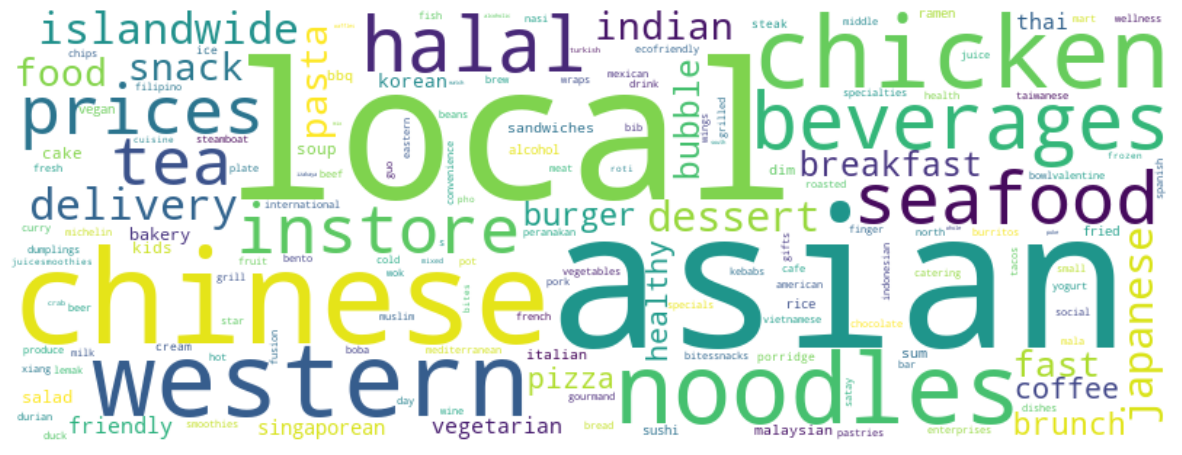

In [21]:
# Create a WordCloud object
#wcloud = wordcloud.WordCloud(collocations = False)
#wcloud = wcloud.generate(text_food)
# Open a plot of the generated image

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", width=800, height=300, collocations= False)
wc.generate(text_food)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from nltk.stem import WordNetLemmatizer 

In [23]:
plt.figure(figsize = (16,6))
sns.set(font_scale=1.1)


<Figure size 1600x600 with 0 Axes>

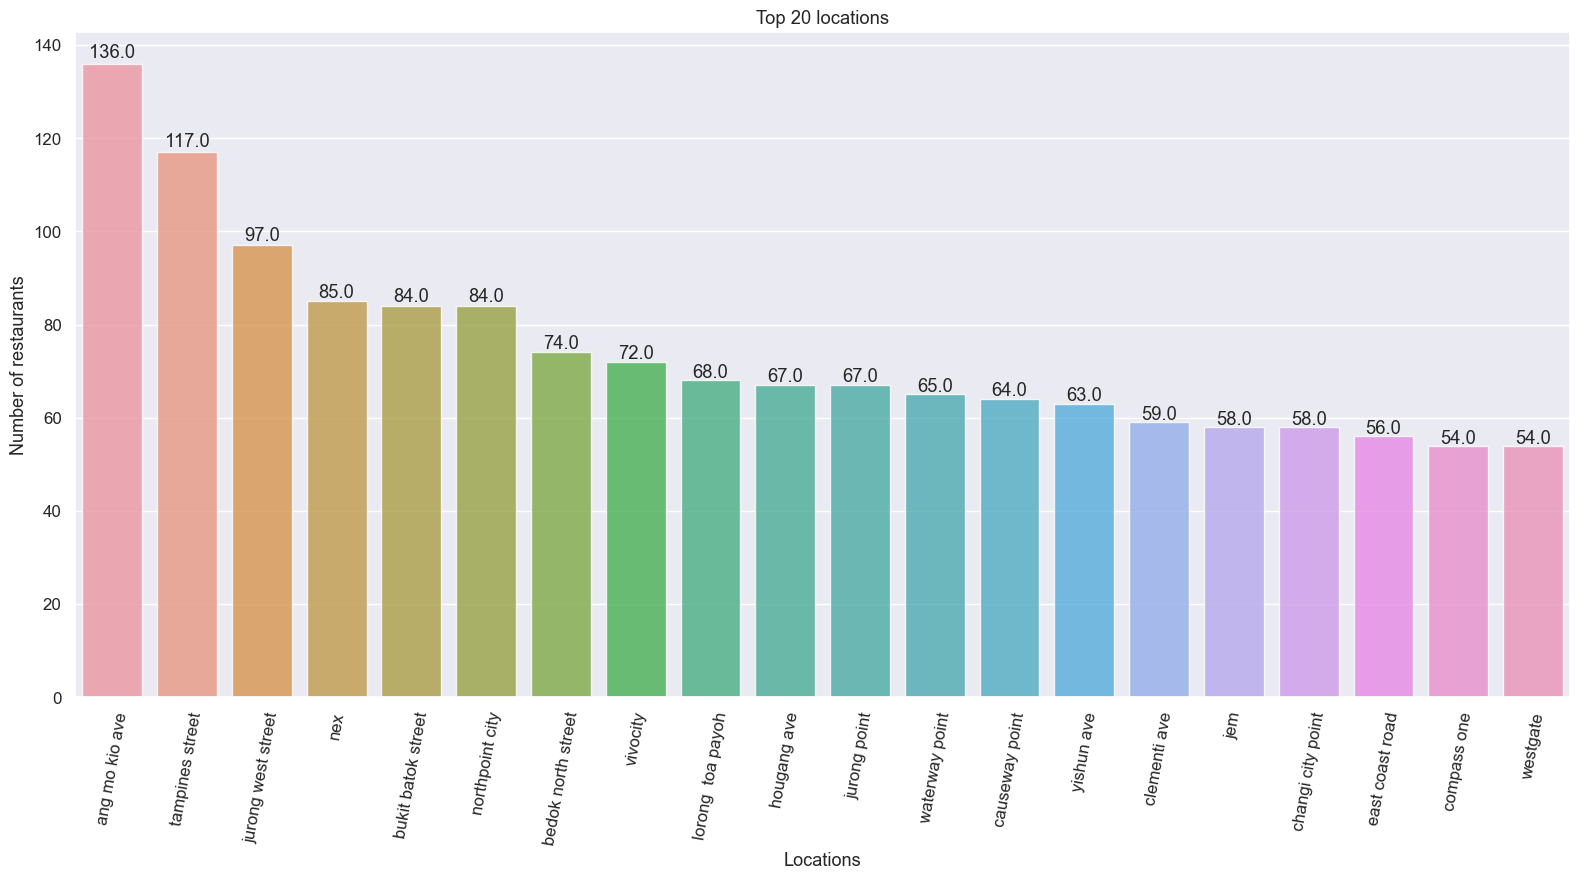

In [24]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
loc_count  = df1['location'].value_counts()
loc_count = loc_count[:20,]

plt.figure(figsize=(16,9))
ax = sns.barplot(x = loc_count.index, y = loc_count.values, data=df1, alpha=0.8)
plt.title('Top 20 locations')
plt.ylabel('Number of restaurants', fontsize=13)
plt.xlabel('Locations', fontsize=13)
plt.xticks(rotation=80)
plt.tight_layout()

show_values(ax)

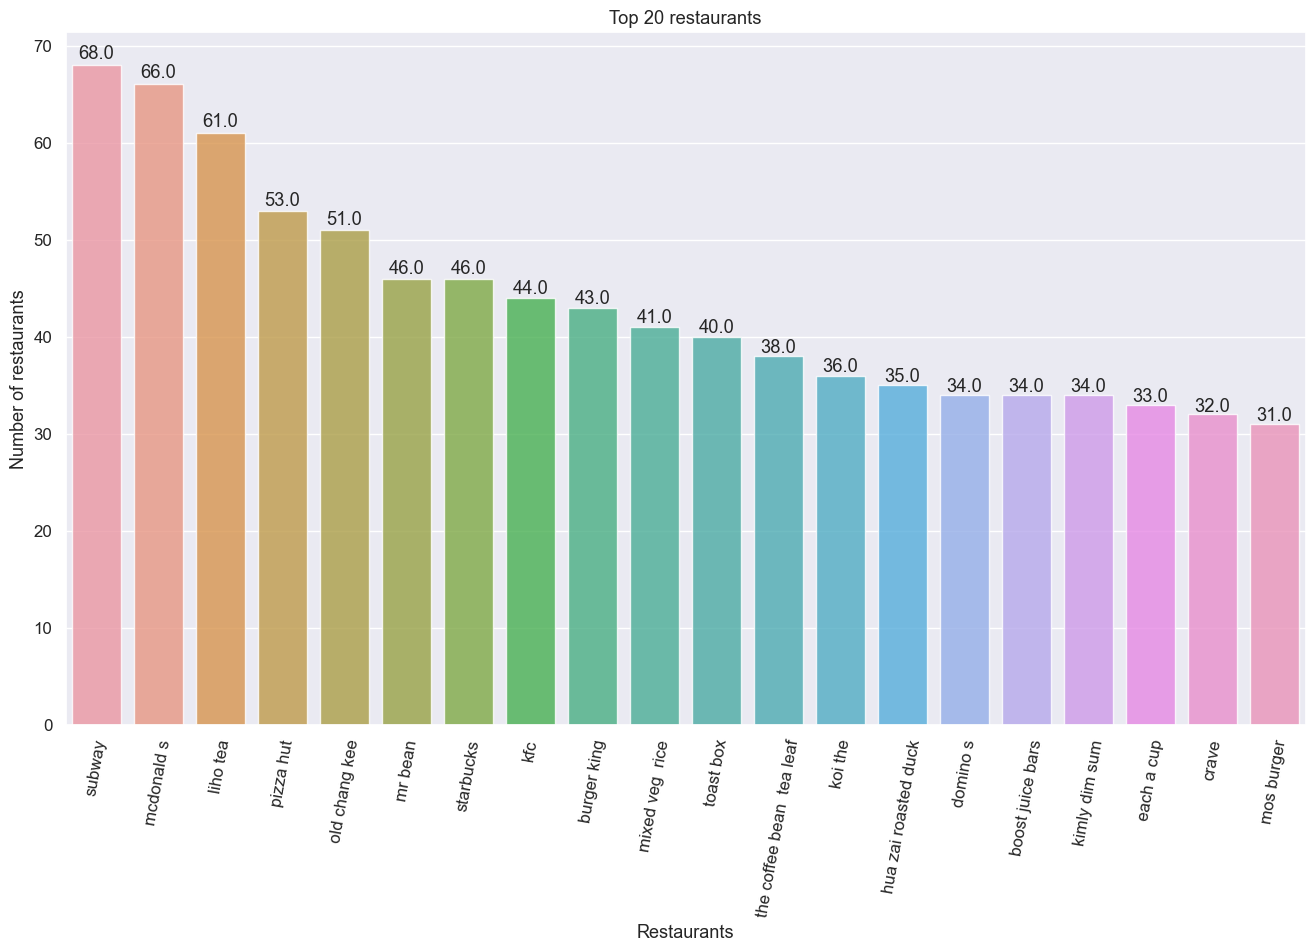

In [25]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
loc_count  = df1['name'].value_counts()
loc_count = loc_count[:20,]

plt.figure(figsize=(16,9))
ax = sns.barplot(x = loc_count.index, y = loc_count.values, data=df1, alpha=0.8)
plt.title('Top 20 restaurants')
plt.ylabel('Number of restaurants', fontsize=13)
plt.xlabel('Restaurants', fontsize=13)
plt.xticks(rotation=80)

show_values(ax)

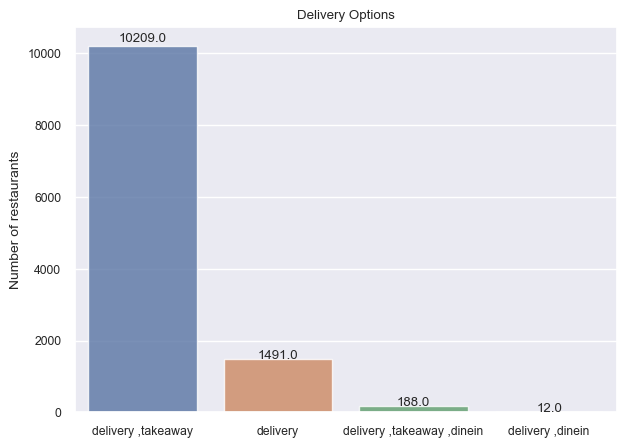

In [26]:
sns.set(font_scale=0.8)

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
loc_count  = df1['delivery_options'].value_counts()
#loc_count = loc_count[:4,]

plt.figure(figsize=(7,5))
ax = sns.barplot(x = loc_count.index, y = loc_count.values, data=df1, alpha=0.8)
plt.title('Delivery Options')
plt.ylabel('Number of restaurants', fontsize=10)
#plt.xlabel('Options', fontsize=10)
#plt.xticks(rotation=80)

show_values(ax)

<AxesSubplot:ylabel='promo_count'>

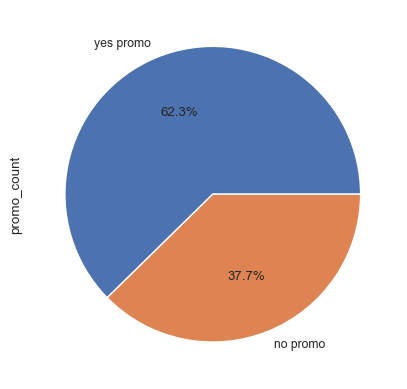

In [27]:
df1.promo_count.value_counts().plot(kind='pie', autopct='%1.1f%%')

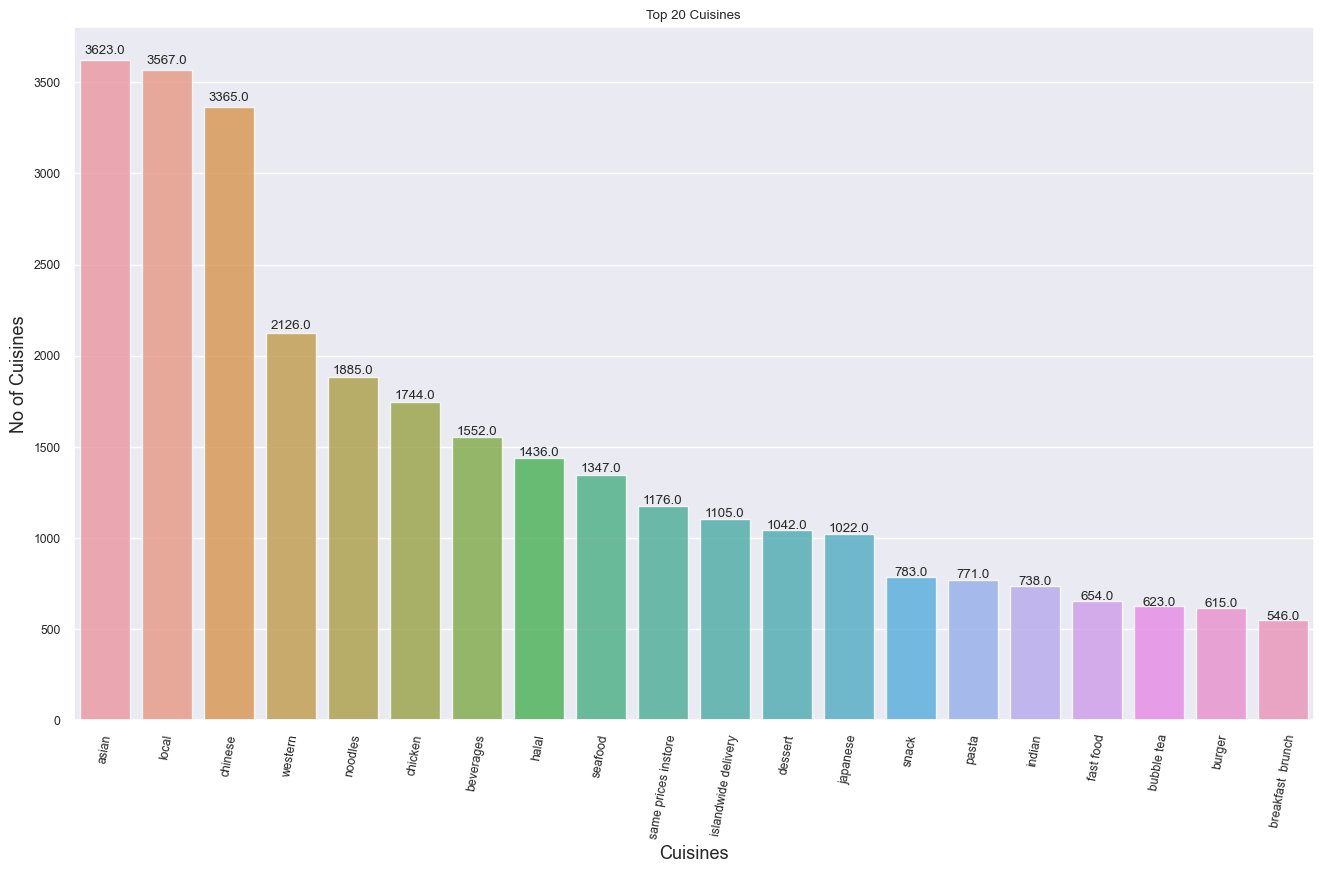

In [28]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
loc_count  = df2['cuisine'].value_counts()
loc_count = loc_count[:20,]

plt.figure(figsize=(16,9))
ax = sns.barplot(x = loc_count.index, y = loc_count.values, data=df2, alpha=0.8)
plt.title('Top 20 Cuisines')
plt.ylabel('No of Cuisines', fontsize=13)
plt.xlabel('Cuisines', fontsize=13)
plt.xticks(rotation=80)

show_values(ax)

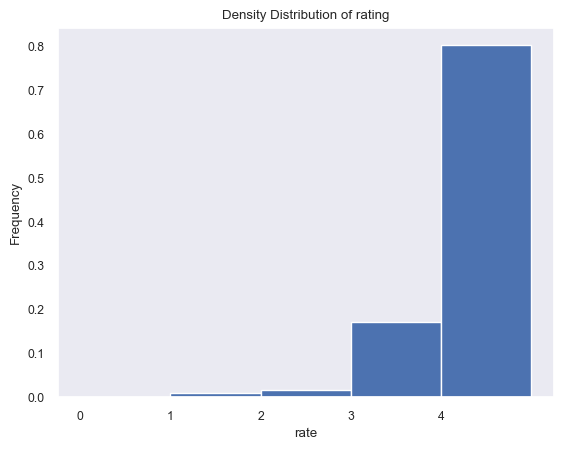

In [29]:
df1['rating'].plot.hist(bins=5, alpha=1, density=True, range=(0,5))

# show setting
plt.title('Density Distribution of rating')
plt.xticks(np.arange(0, 5, step=1))
plt.xlabel('rate')
plt.grid()

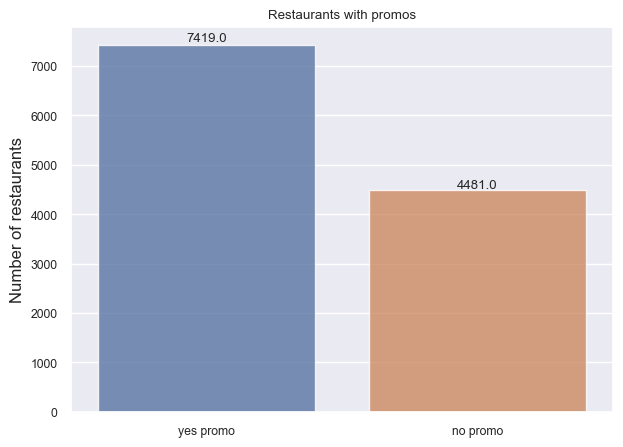

In [30]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
loc_count  = df1['promo_count'].value_counts()
#loc_count = loc_count[:4,]

plt.figure(figsize=(7,5))
ax = sns.barplot(x = loc_count.index, y = loc_count.values, data=df1, alpha=0.8)
plt.title('Restaurants with promos')
plt.ylabel('Number of restaurants', fontsize=12)
#plt.xlabel('Options', fontsize=12)
#plt.xticks(rotation=90)

show_values(ax)

count    11900.000000
mean        10.253918
std          6.680294
min          1.990000
25%          4.500000
50%          6.900000
75%         16.800000
max         40.000000
Name: delivery_cost, dtype: float64

<Figure size 1600x900 with 0 Axes>

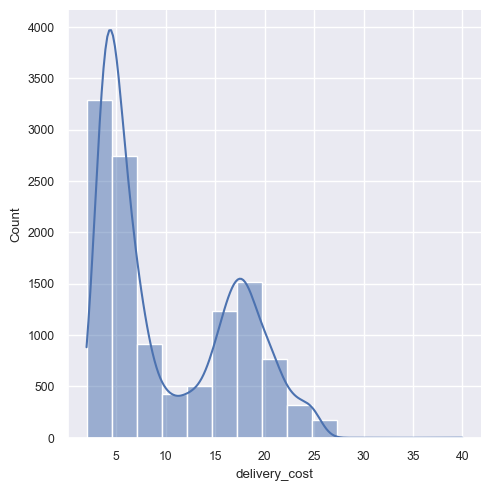

In [31]:
plt.figure(figsize=(16,9))

sns.displot(df1['delivery_cost'], kde=True, bins=15)
df1['delivery_cost'].describe()

count    11900.000000
mean        38.503950
std         15.448732
min         15.000000
25%         29.000000
50%         35.000000
75%         42.000000
max        150.000000
Name: delivery_time, dtype: float64

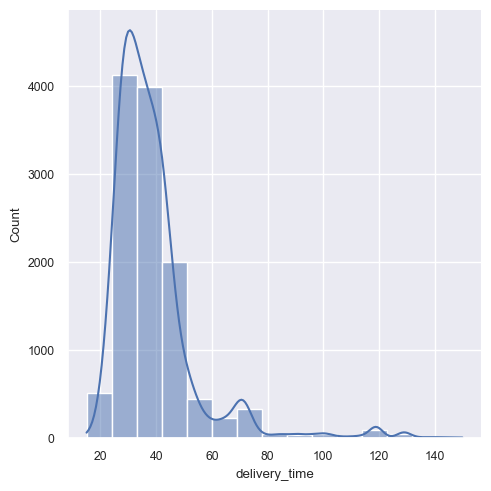

In [32]:
sns.displot(df1['delivery_time'], kde=True, bins=15)
df1['delivery_time'].describe()

count    11900.000000
mean      6596.085126
std       6211.078306
min       2000.000000
25%       4999.000000
50%       5000.000000
75%       5000.000000
max      25000.000000
Name: radius, dtype: float64

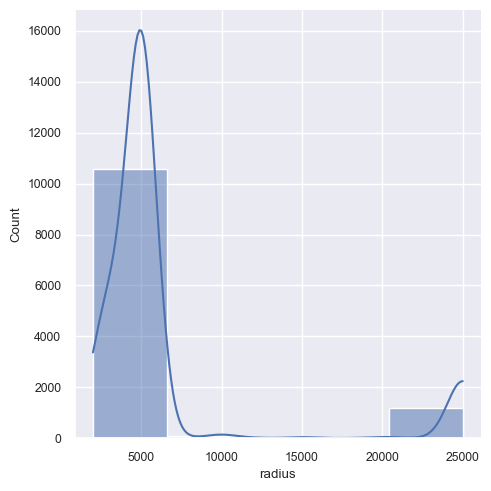

In [33]:
sns.displot(df1['radius'], kde=True, bins=5)
df1['radius'].describe()

count    11900.000000
mean         4.206294
std          0.543332
min          1.000000
25%          4.000000
50%          4.300000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

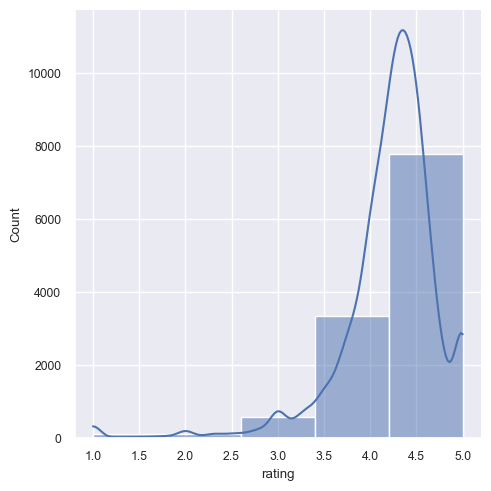

In [34]:
sns.displot(df1['rating'], kde=True, bins=5)
df1['rating'].describe()

count    11900.000000
mean       382.307731
std        896.608622
min          1.000000
25%         21.000000
50%         92.000000
75%        361.000000
max      21113.000000
Name: reviews_nr, dtype: float64

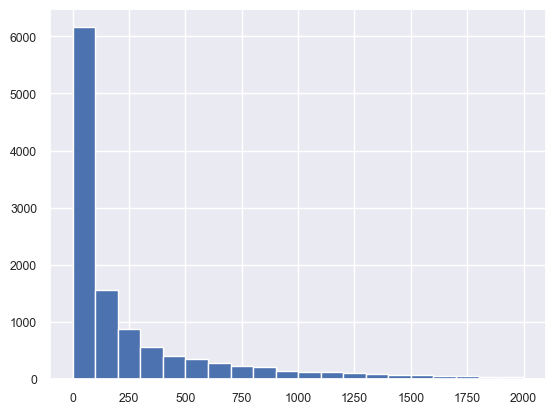

In [35]:
plt.hist(df1['reviews_nr'], bins=20, range=[1, 2000])
df1['reviews_nr'].describe()

In [36]:
shops_name =" ".join(df2['name'])

(-0.5, 1599.5, 799.5, -0.5)

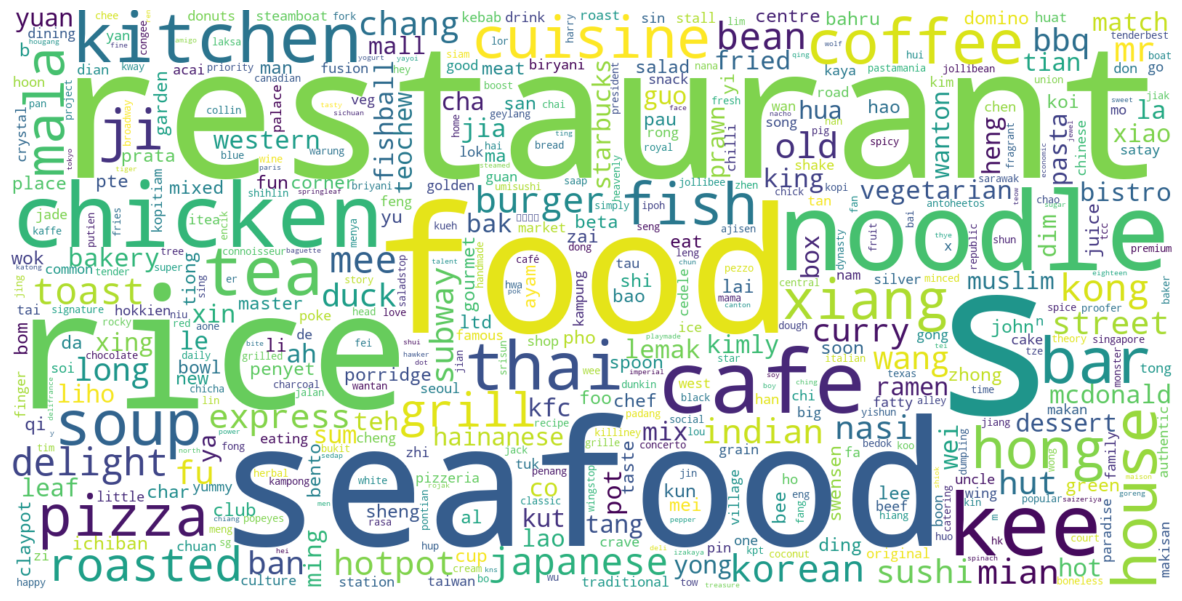

In [37]:
# Create a WordCloud object
#wcloud = wordcloud.WordCloud(collocations = False)
#wcloud = wcloud.generate(same_price)
# Open a plot of the generated image

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", max_words=500, max_font_size= 300,  width=1600, height=800, collocations= False)
wc.generate(shops_name)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')